# Identification
Please indicate your name

Student 1: Erisa Kohansal 28708160

Student 2: Sama Satariyan 21318843

# Practical work 3: 2D sampling and aliasing 

Properties studied in 1D apply in 2D. The following results can be admitted: 
 - given a regular grid, a sampling of a continuous 2D signal can be modeled as follows:
$$
x_s(t,u) = x(t,u)C(t,u)\quad \text{with}\quad C(t,u) = \sum_{k=-\infty}^{+\infty} \sum_{l=-\infty}^{+\infty} \delta(t-kT_s,u - lT_s)
$$ $C$ is the analog of Dirac comb (also called impulse train) in 2D
 - spectrum of $x_s$ writes:
$$
X_s(f,g) = \frac1{T_s^2}\sum_{k=-\infty}^{+\infty} \sum_{l=-\infty}^{+\infty} X(f-kf_s,g-lf_s)
$$
2D sampling then implies a periodization of the spectrum for the two dimensions
 - it is possible to reconstruct the original signal from the sampled signal if the 2D Shannon condition is verified (band-limited signal) with:
$$
x_r (t,u) = \sum_{k=-\infty}^{+\infty} \sum_{l=\infty}^{+\infty} x_s(kT_s,lT_s) \operatorname{sinc}(\pi f_s (t-kT_s)) \operatorname{sinc}(\pi f_s(u - lT_s))\qquad\qquad\qquad\text{(1)}
$$
so-called Shannon interpolation.
 
## Exercise 1: aliasing and windowing of 2D signals
 
Given the following signal:
$$
s_\theta(t,u) = A\cos(2\pi f_0(t\cos\theta + u\sin\theta))
$$
Here an example with $\theta=\frac\pi4$:
<div>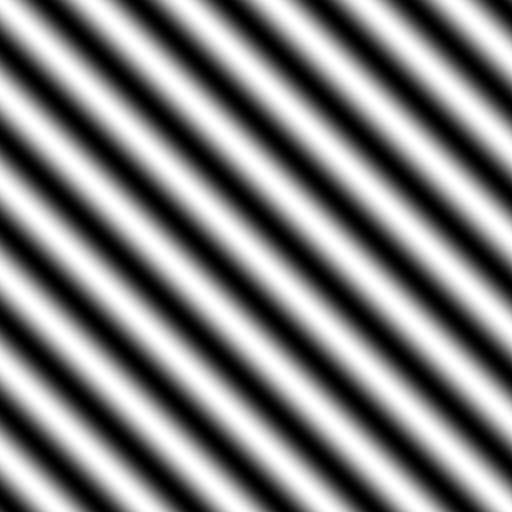</div>
The goal of this exercise is to study the limit conditions of sampling this image in order to avoid aliasing.

In [1]:
import numpy as np
from numpy.fft import fft2, fftshift
import matplotlib.pyplot as plt
# for interactive ploting, see surf() below
%matplotlib inline 
from matplotlib import cm
from matplotlib.colors import Normalize
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image

def sinusoid2d(A, theta, size, T0, Te):
    """ double**2*int*double**2 -> Array[double] """
    ct = np.cos(theta/180*np.pi) # theta/180*np.pi convertit theta de degrés en radians
    st = np.sin(theta/180*np.pi)
    x, y = np.meshgrid(np.arange(0, size, Te), np.arange(0, size, Te))
    # les np.arange se charge de l'échantillonage
    # np.meshgrid 
    return A*np.cos(2*np.pi*(y*ct - x*st)/T0)

def shannonInterpolation(I, Ts, size):
    """ Array*int*double -> Array[double] """
    n, m = I.shape
    x, y = np.meshgrid(np.arange(0, size), np.arange(0, n))
    Y = np.sinc(x/Ts-y)
    x, y = np.meshgrid(np.arange(0, size), np.arange(0, m))
    X = np.sinc(x/Ts-y)
    return np.matmul(X.T, np.matmul(I, Y))

def imshow(I,title=None):
    """ display an image """
    plt.figure(figsize=(500//80,500//80))
    plt.gray()
    plt.imshow(I)
    if title: plt.title(title)
    plt.show()

def surf(Z,title=None):
    """ 3D plot of an image """
    X,Y = np.meshgrid(range(Z.shape[1]), range(Z.shape[0]))
    fig = plt.figure(figsize=(600/80,600/80))
    if title: plt.title(title)
    # ax = fig.gca(projection='3d')
    ax = plt.subplot(projection='3d')
    ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    plt.show()
    
def computeFT(I):
    return fft2(I)

def toVisualizeFT(If):
    return np.abs(fftshift(If))
    

1. We provide the function `sinusoid2d(A, theta, L, T0, Ts)` that allows sampling signal $s_\theta$ with a sampling period of `Ts` (the grid is regular with the sample sampling value for directions $u$ and $t$). Parameters `A`, `theta`, `L`, and `T0` respectively control the amplitude, orientation, and period ($T_0=\frac1{f_0}$) of signal $s_\theta$. Generate a pseudo continuous signal $s_{45}$ with `A=1`, `theta = 45`, `L = 512`, `T0 = 64` and `Ts=1`.


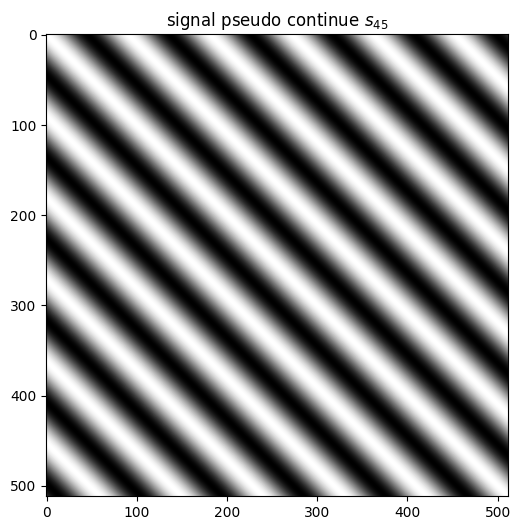

In [2]:
A = 1
theta = 45
L = 512
T0 = 64
Ts = 1

s45 = sinusoid2d(A, theta, L, T0, Ts)
imshow(s45, "signal pseudo continue $s_{45}$")

2. (a) What is the maximal frequency of previous signal $s_{45}$ in direction $t$ (denoted $f_t^{\text{max}}$) and direction $u$ (denoted $f_u^{\text{max}}$)? Let $f_m = \max(f_t^{\text{max}},f_u^{\text{max}})$. Explain why $f_m$ can be used to derive the limit frequency (in sens of Shannon) for the sampling of $s_{45}$.

L'argument du cosinus du signal $s_{45}$ contient deux parties distinctes : 
- partie dépendante de $t$ : $f_0cos\theta$, désigne la contribution de $t$ dans la création du $s_{45}$.
$$f^{max}_{t}=f_0cos\theta$$
- partie dépendante de $u$ : $f_0sin\theta$, désigne la contribution de $u$ dans la création du $s_{45}$.
$$f^{max}_{u}=f_0sin\theta$$

D'après la question précédente, on a $T_0 = \frac{1}{f_0} = 64$. Or on a $f_0 = \frac{1}{64}$. De plus, on sait que $\theta = 45°$. On aura alors : 
- $f_t^{max} = \frac{1}{64} \times cos\theta = \frac{1}{64} \times \frac{\sqrt 2}{2} = \frac{\sqrt 2}{128}$
- $f_u^{max} = \frac{1}{64} \times sin\theta = \frac{1}{64} \times \frac{\sqrt 2}{2} = \frac{\sqrt 2}{128}$

On souhaite déterminer $f_m = max(f_t^{max}, f_u^{max}) = \frac{\sqrt 2}{128} \approx 0,011.$

Il faut aussi noter que d'après le théorème Nyquist-Shannon(= théorème de Shannon en 2D), pour qu'on puisse reconstruire le signal échantillonné $s_{45} = x_s(t, u)$, il faut que le $f^s_t$ (resp. $f^s_u$) soit au mois égal à $2f^{max}_t$ (resp. $f^{max}_u$) : 

$$f^s_t \geq 2f^{max}_t, f^s_u \geq 2f^{max}_u$$

Donc si on prend la valeur maximale des fréquences dans les deux directions $t$ et $u$, on peut s'assurer que l'échantillonnage respecte la condition de Shannon dans toutes les directions. D'où $f_m = max(f_t^{max}, f_u^{max})$.

2. (b)  Sample $s_{45}$ with $f_s = 16 f_m$ and display the sampled signal.

In [3]:
def calcul_fm(theta, T0):
    F0 = 1/T0
    return float(max(F0 * np.abs(np.cos(theta/180*np.pi)), F0 * np.abs(np.sin(theta/180*np.pi))))

<class 'numpy.float64'>


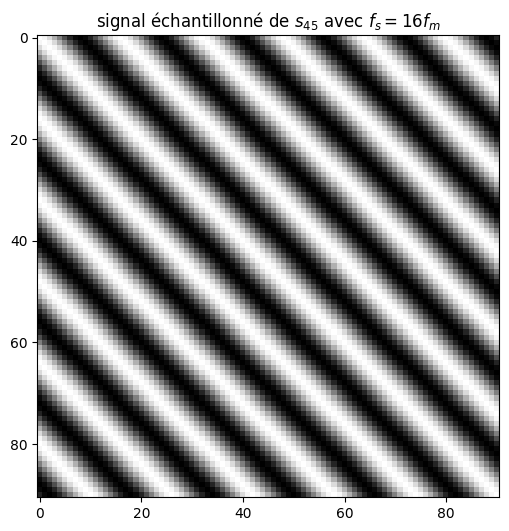

In [5]:
# T16 = calcul_fm(theta, T0)
# print(type(T16))
f0 = 1/64
fm = f0 * np.sqrt(2) / 2
f16 = 16 * fm
T16 = 1/f16
sampled16fm = sinusoid2d(A, theta, L, T0, T16)
imshow(sampled16fm, "signal échantillonné de $s_{45}$ avec $f_s = 16f_m$")

2. (c) Compute the Fourier transform of the sampled signal and display frequencies. One can use `surf()` function for an interactive 3D plot.

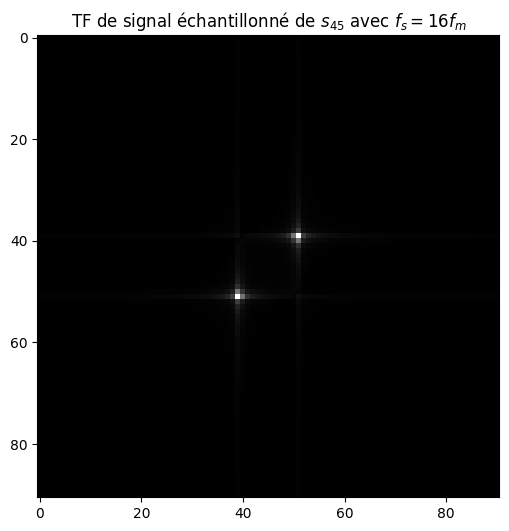

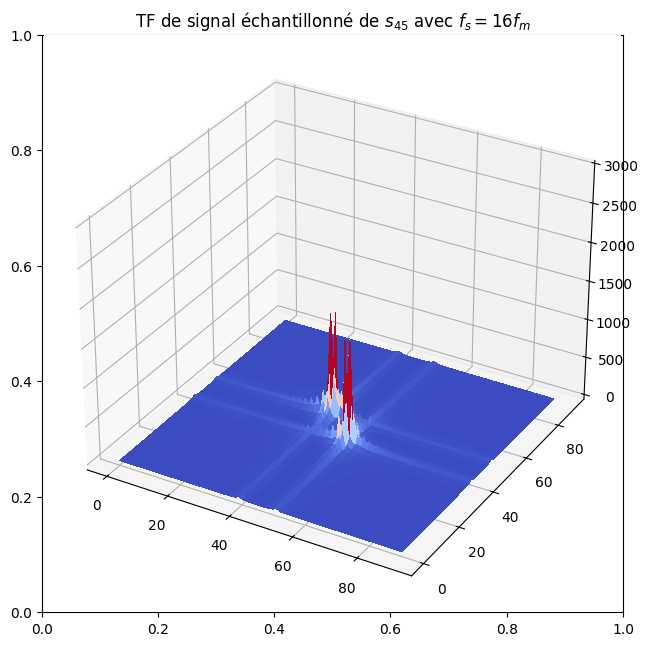

In [6]:
sampleFFT = computeFT(sampled16fm)
sampleFT = toVisualizeFT(sampleFFT)
imshow(sampleFT, "TF de signal échantillonné de $s_{45}$ avec $f_s = 16f_m$")
surf(sampleFT, "TF de signal échantillonné de $s_{45}$ avec $f_s = 16f_m$")

2. (d) Comment the spectrum:
    - verify the presence of the two Dirac peaks
    - for various values of $T_s$, observe changes in the spectrum. Compare with the spectrum of the continuous signal ($s_{45}$). What is the origin of these differences?
    - Why, aside from the two Dirac peaks, there are some structures? Explain the origin of these lobes.
    - Increase $T_0$ in order to obtain a unique peak. Explain the origin of this fusion. Verify the limit value of $T_0$ for which the two peaks interfere.

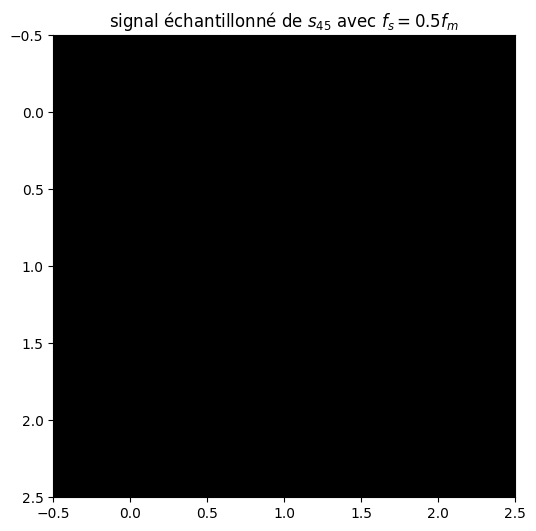

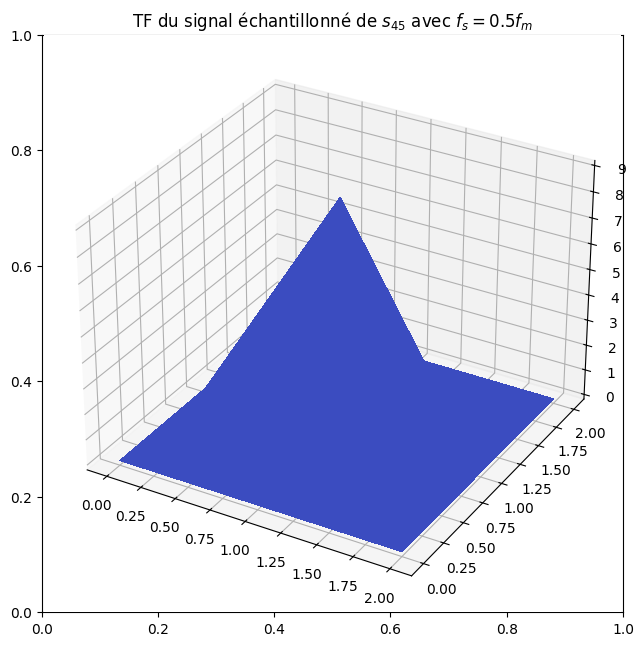

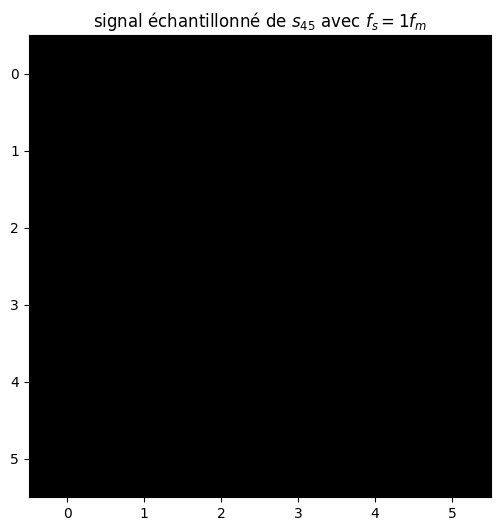

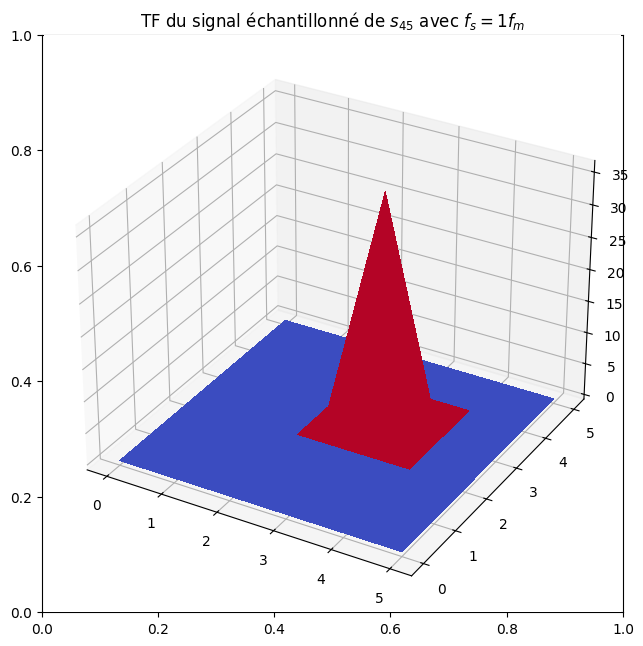

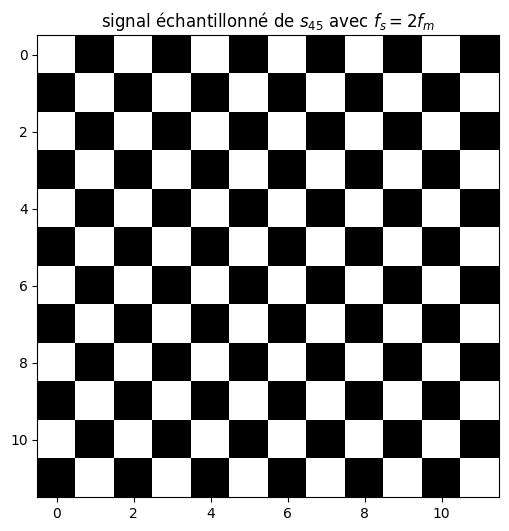

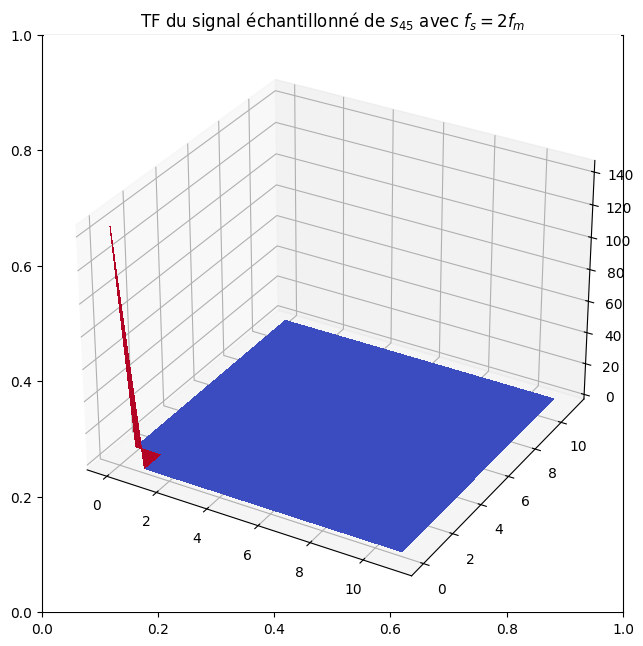

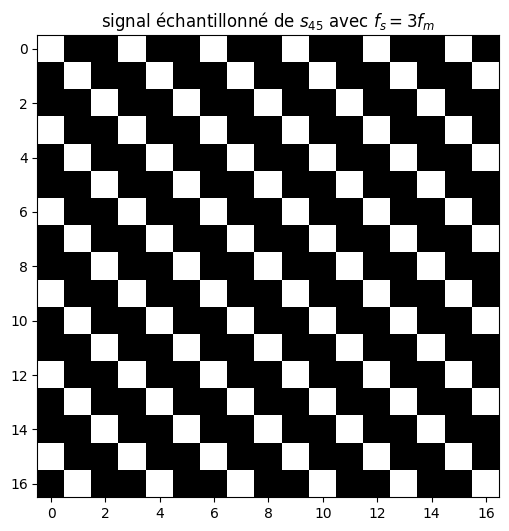

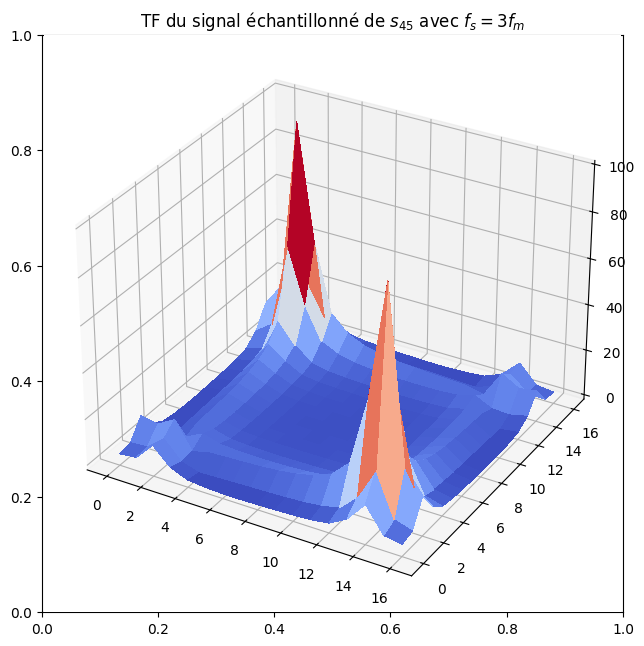

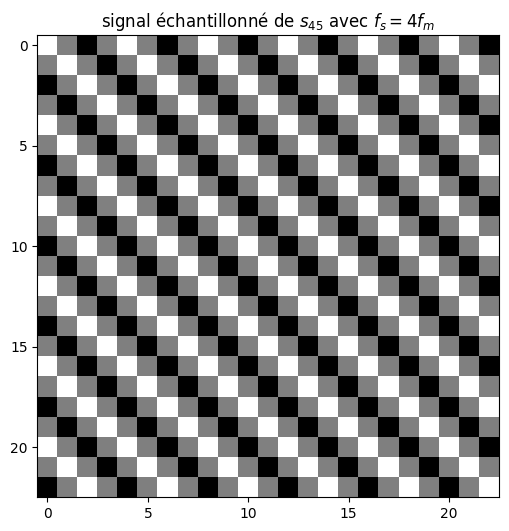

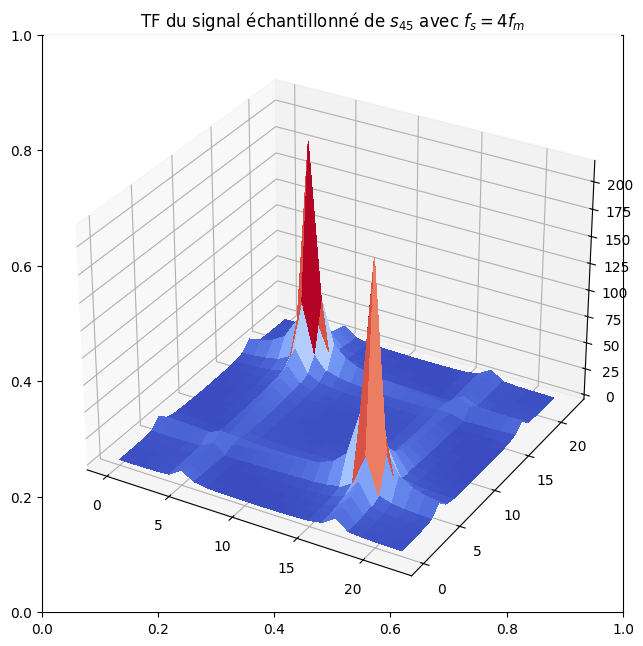

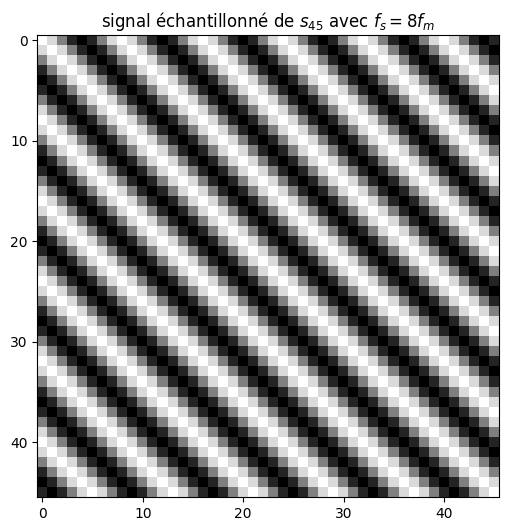

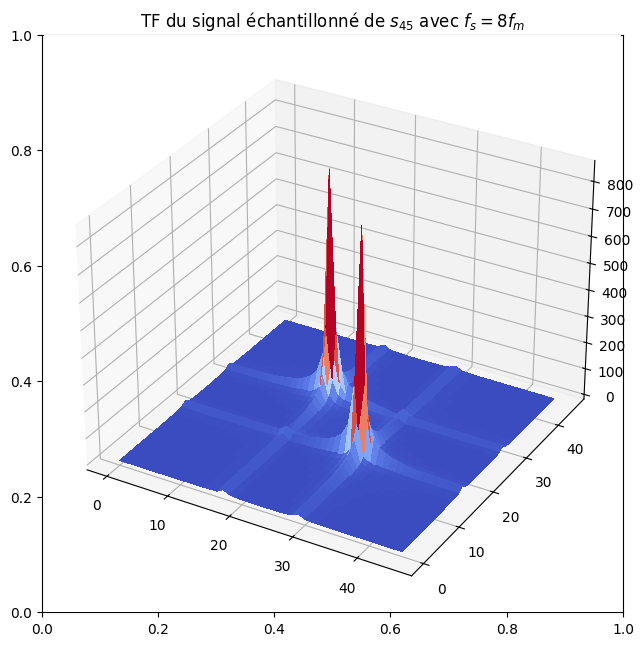

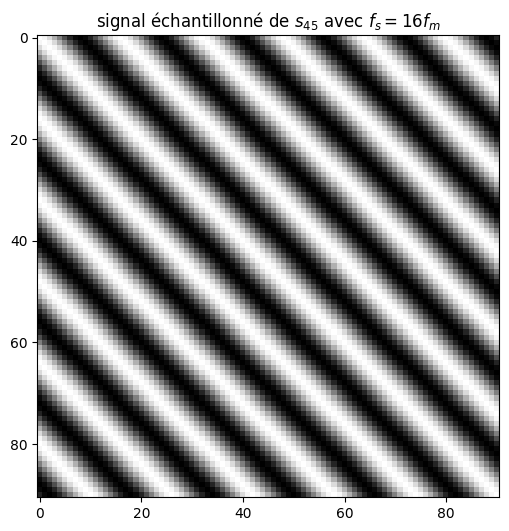

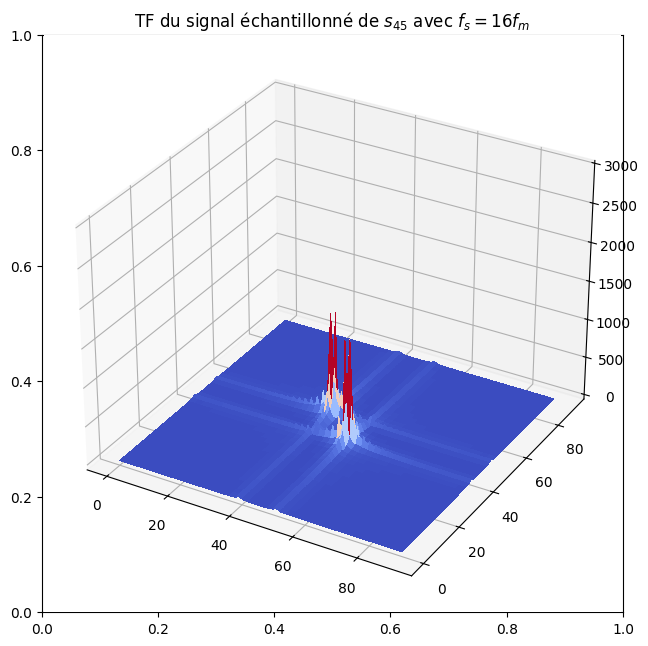

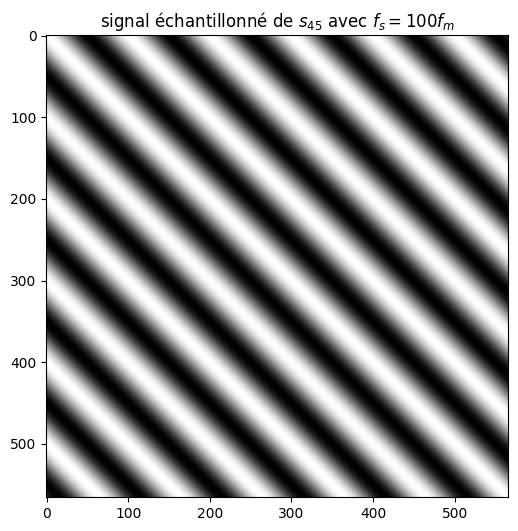

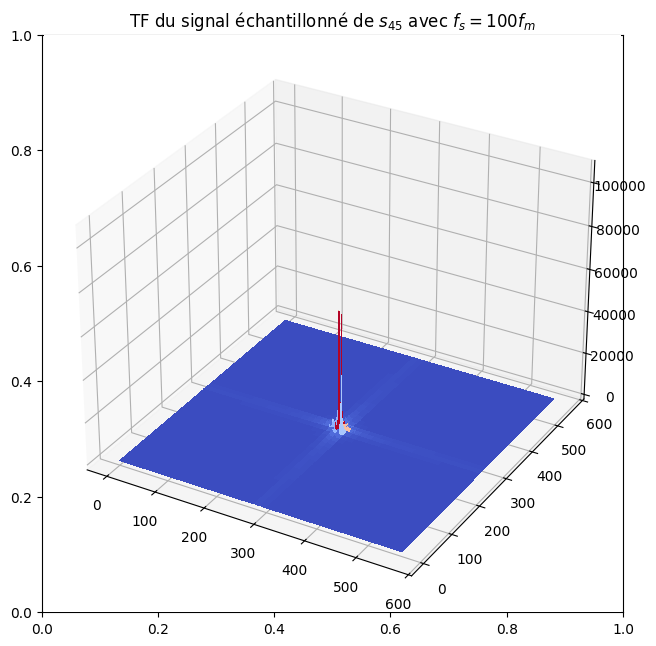

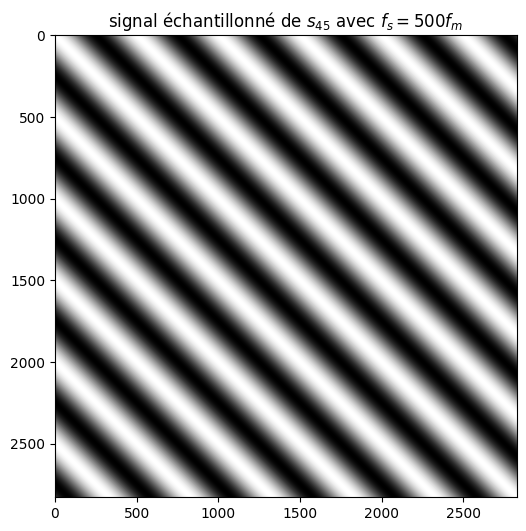

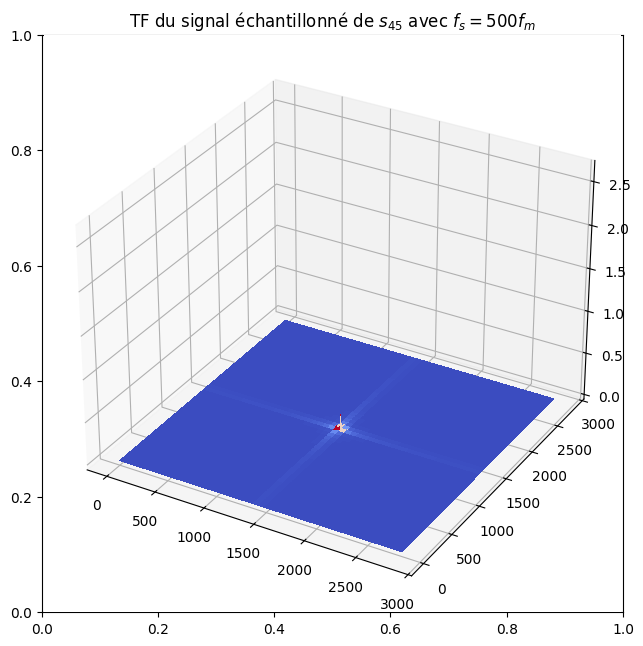

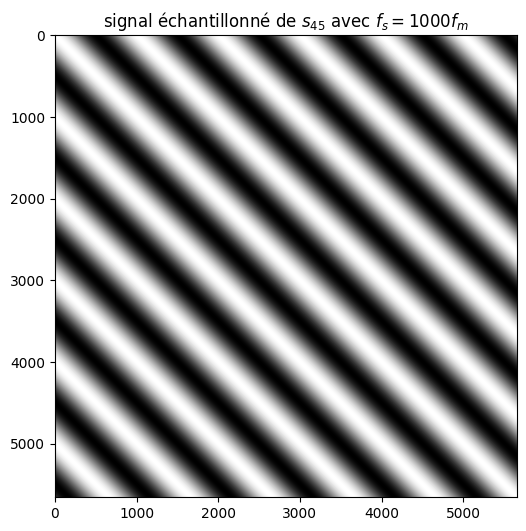

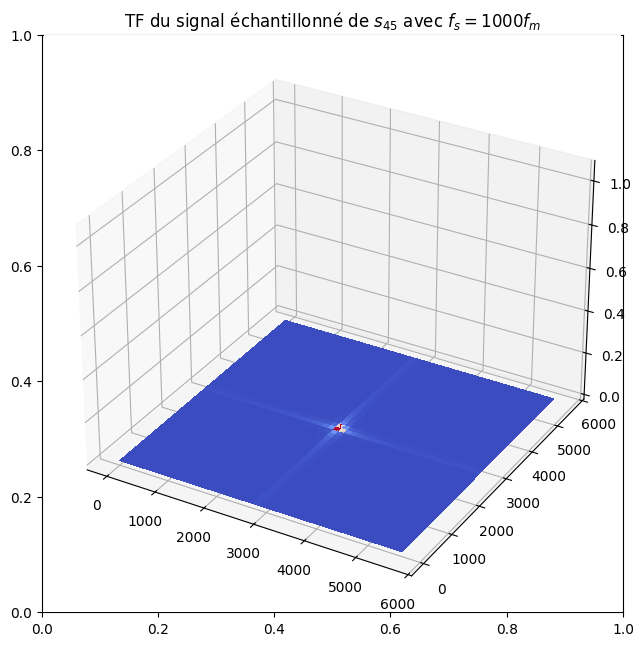

In [7]:
for coeff in [0.5, 1, 2, 3, 4, 8, 16, 100, 500, 1000]:
    fs = coeff * fm
    ts = 1/fs
    tmp = sinusoid2d(A, theta, L, T0, ts)
    ft = toVisualizeFT(computeFT(tmp))
    imshow(tmp, "signal échantillonné de $s_{45}$" + f" avec $f_s = {coeff}f_m$")
    #imshow(ft, "TF du signal échantillonné de $s_{45}$" + f" avec $f_s = {coeff}f_m$")
    surf(ft, "TF du signal échantillonné de $s_{45}$" + f" avec $f_s = {coeff}f_m$")


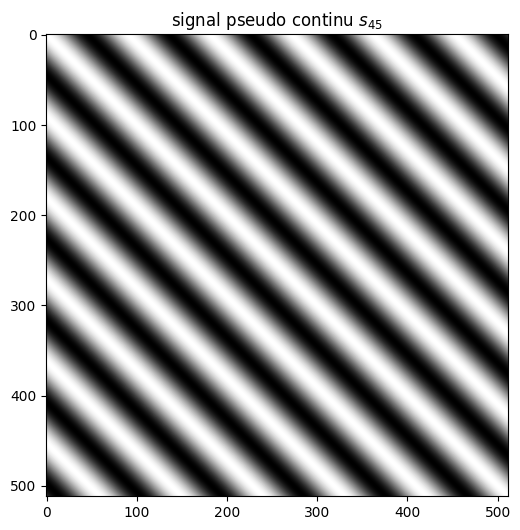

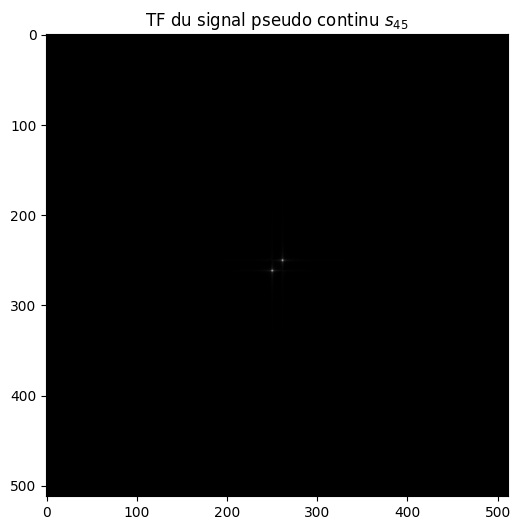

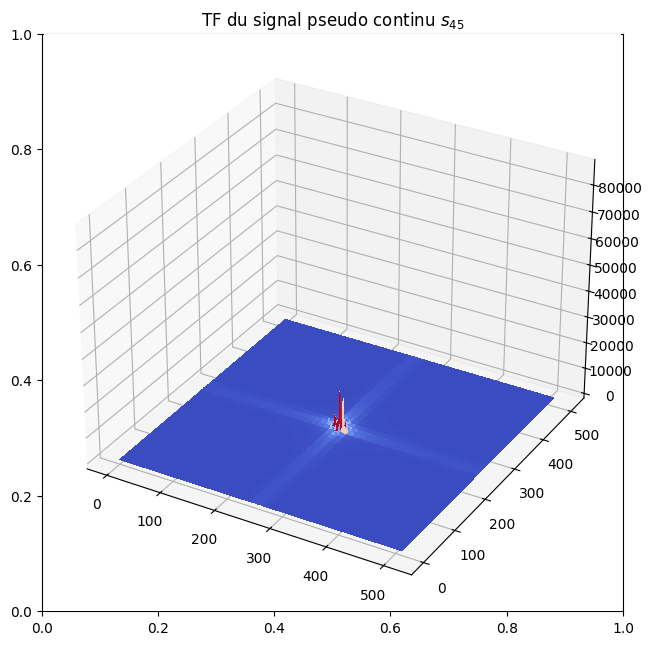

In [8]:
# spectre du signal continu s45
TFs45 = toVisualizeFT(computeFT(s45))
imshow(s45, "signal pseudo continu $s_{45}$")
imshow(TFs45, "TF du signal pseudo continu $s_{45}$")
surf(TFs45, "TF du signal pseudo continu $s_{45}$")

Variations de $T_s$:
- Lorsque $f_s \geq 2 f_m$, on peut toujours observer deux pics de Dirac dans le spectre, avec chacun de ses pics correspondant aux fonctions $cos\theta$ et $sin\theta$ du signal. En d'autres termes, si les deux pics de Dirac sont présents, alors la fréquence d'échantillonnage est suffisante pour capturer les fréquences maximales du signal sans aliasing.
Mais lorsque $T_s$ devient trop grand, c'est-à-dire quand $f_s$ devient trop faible, le spectre subit un aliasing. Dans ce cas les fréquences élevées se superposent aux basses fréquences rendant le signal échantillonné incorrect.

- Lorsque $f_s \lt 2 f_m$, ces deux pics vont fusionner à un seul pic car la condition du théorème Nyquist-Shannon n'est pas respectée. A cause de l'insuffisance de la fréquence d'échantiollonnage, les signals se chevauchent.


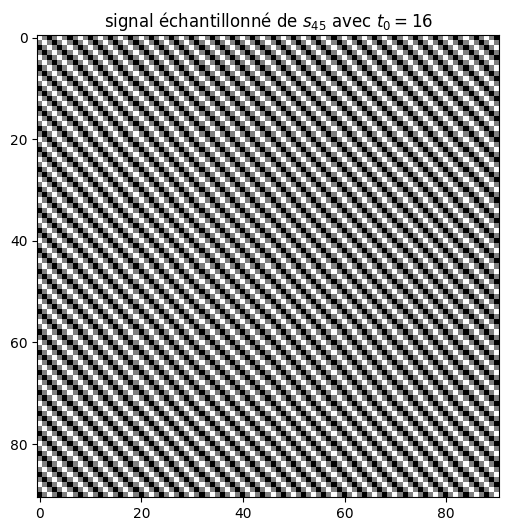

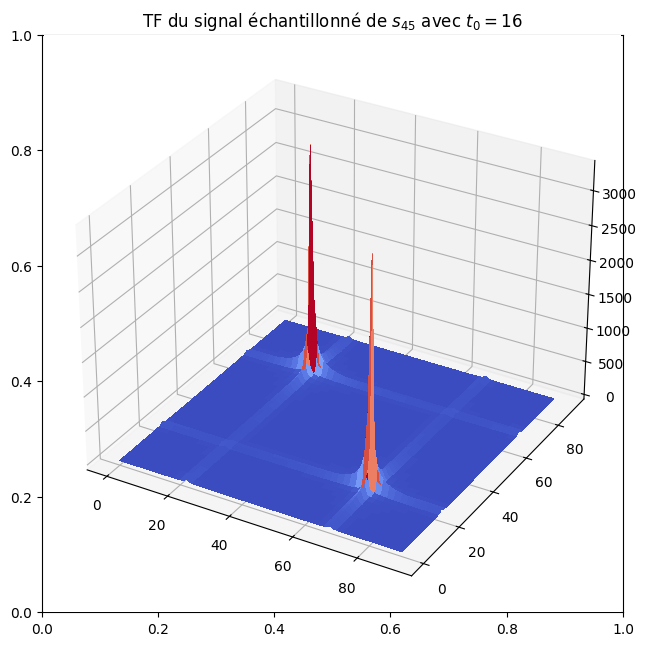

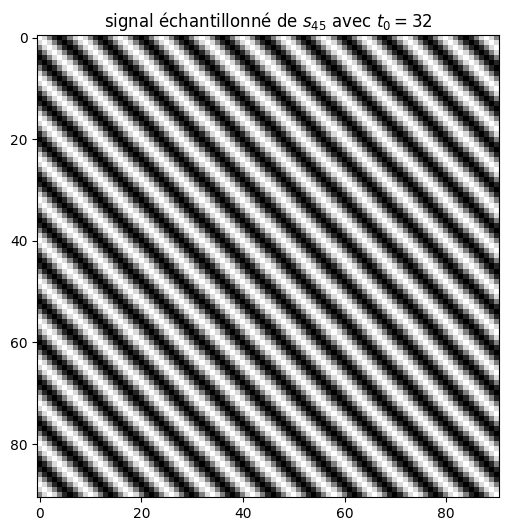

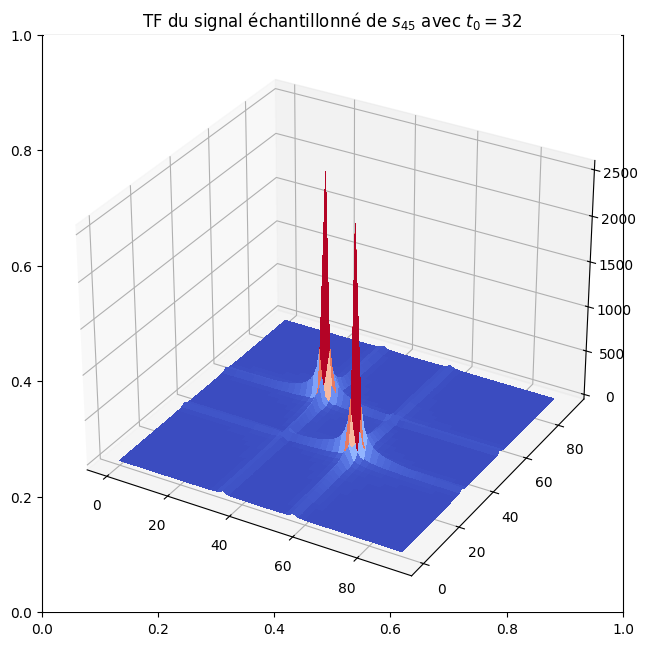

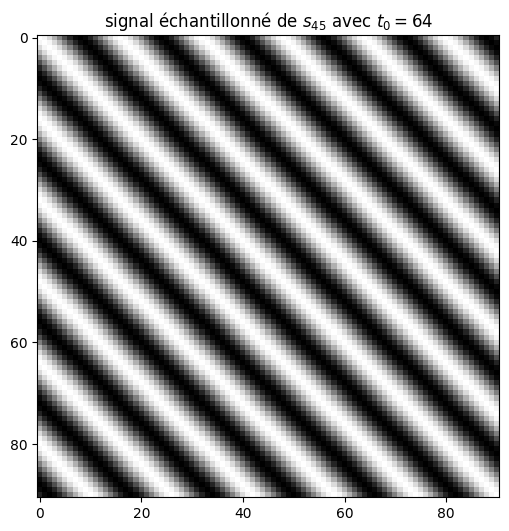

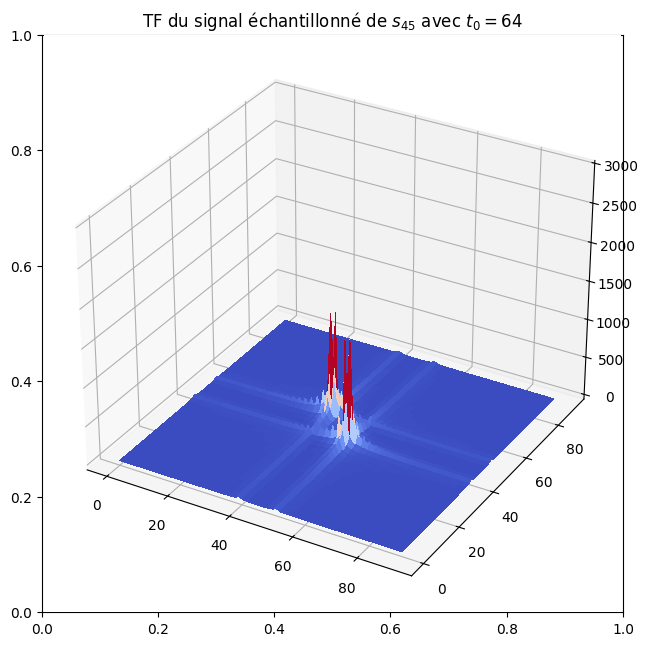

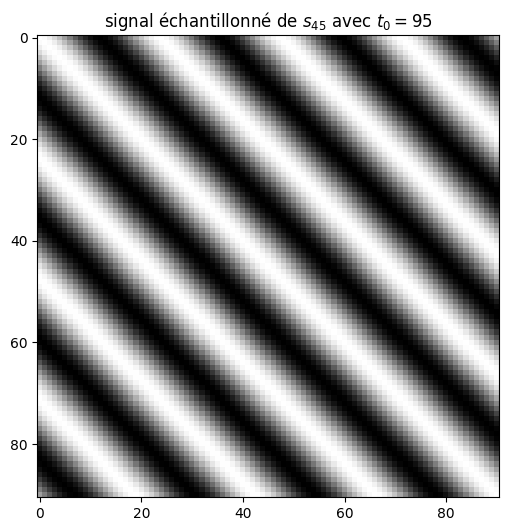

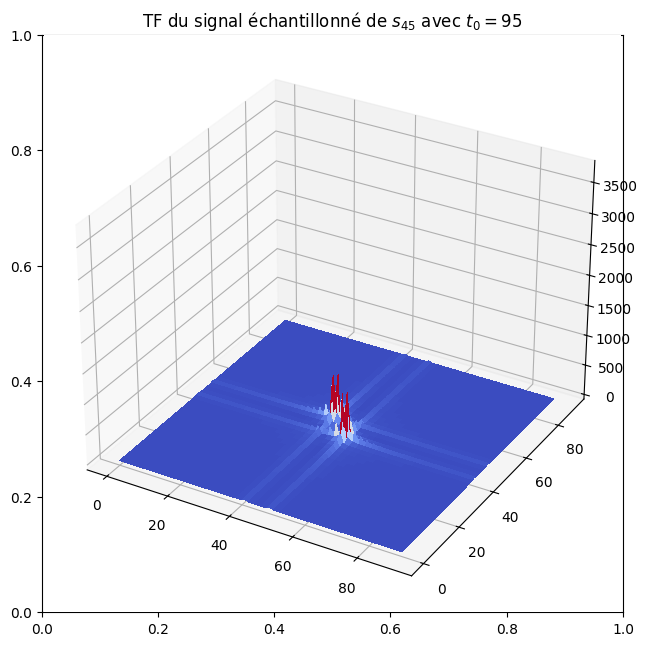

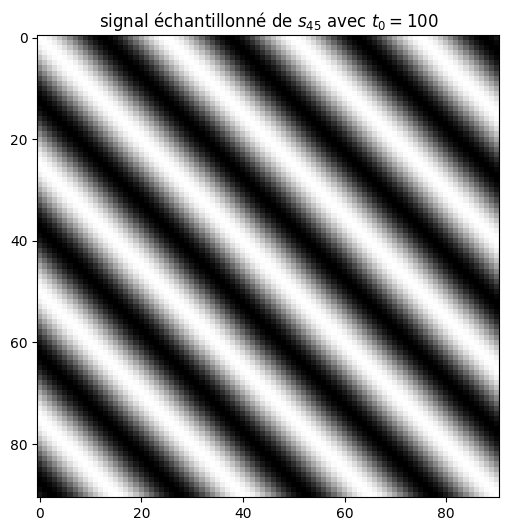

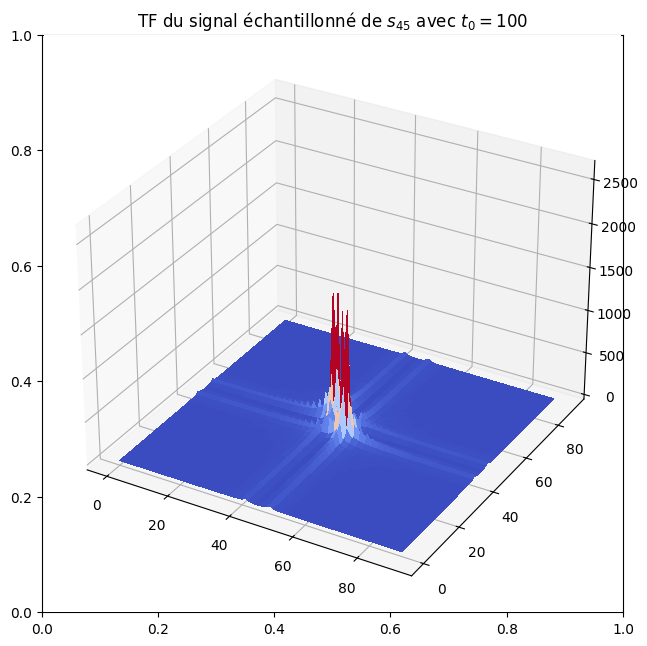

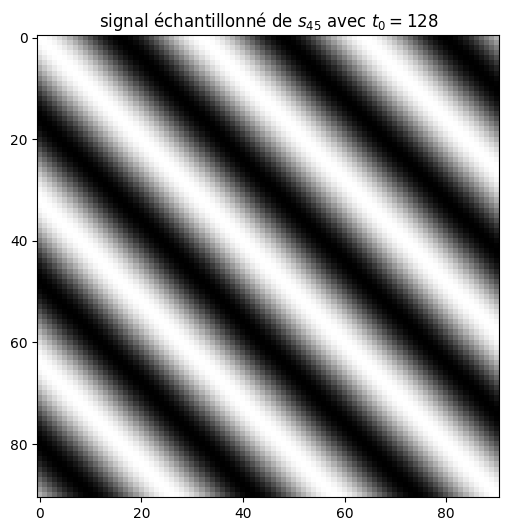

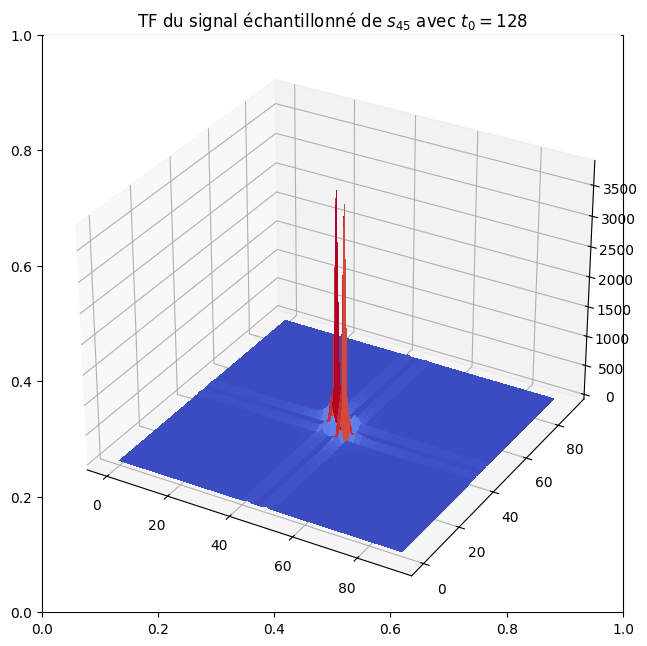

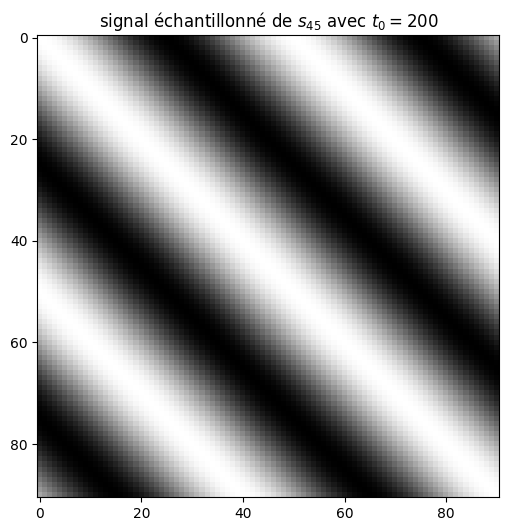

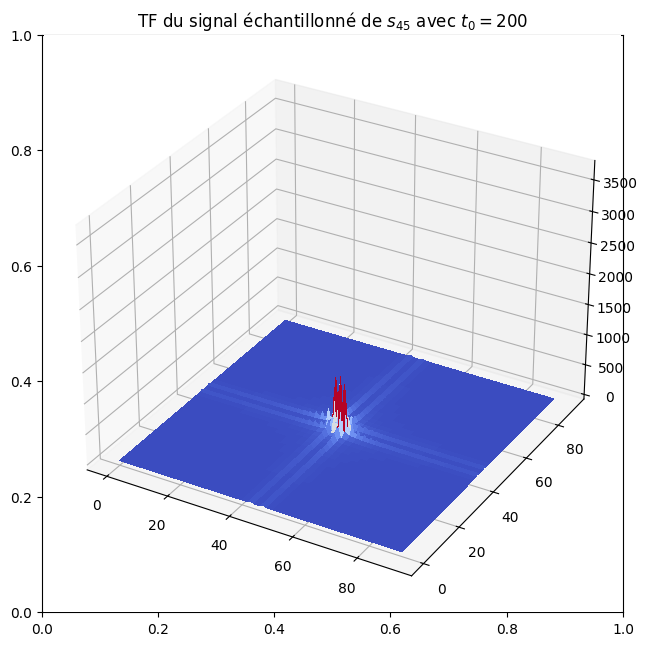

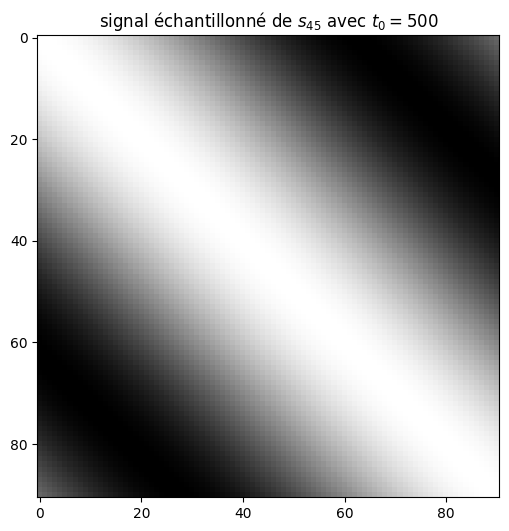

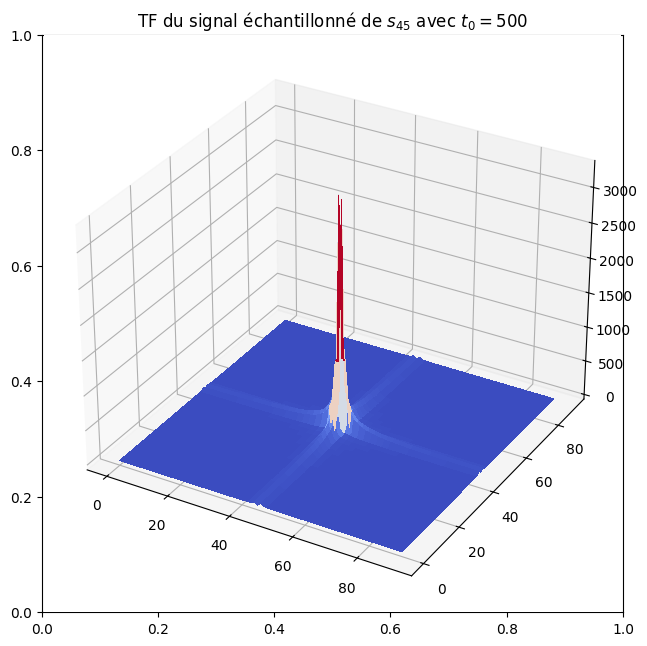

In [9]:
for t0 in [16, 32, 64, 95, 100, 128, 200, 500]:
    tmp = sinusoid2d(1, theta, L, t0, T16)
    ft = toVisualizeFT(computeFT(tmp))
    imshow(tmp, "signal échantillonné de $s_{45}$" + f" avec $t_0 = {t0}$")
    surf(ft, "TF du signal échantillonné de $s_{45}$" + f" avec $t_0 = {t0}$")

Variations de $T_0$ : 
- Lorsque $T_0$ devient très grand, donc $f_0$ est très petit et proche de $0$, les deux pics de Dirac $+f_0$ et $-f_0$ se fusionne (aux alentours de $T_0 =100$). Lorsque $f_0$ devient presque nul, le signal ressemble de plus en plus à une fonction constante. Et une fonction constante n'a qu'une seule composante de fréquence. Donc quand $T_0$ augmente et $f_0$ diminue, les deux pics de Dirac se rapprochent dans le spectre. A l'inverse si $T_0$ diminue, $f_0$ augmente et les deux pics de Dirac s'éloignent l'un de l'autre.

Les lobes font référence à des structures secondaires qui apparaissent autour du pic original dans le domaine fréquentiel.
Dans notre cas, ces lobes qui sont présents autour des pics de Dirac sont dus à la superposition des fonctions ```sinc``` dans le spectre.

3. (a) Sample $s_{45}$ with $f_s=4 f_m$ and display the sampled signal.

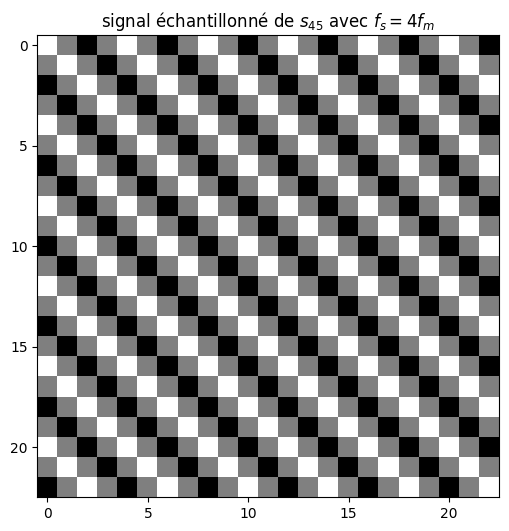

In [10]:
fm4 = 4 * fm
T4 = 1/fm4
sampled4fm = sinusoid2d(A, theta, L, T0, T4)
imshow(sampled4fm, "signal échantillonné de $s_{45}$ avec $f_s = 4f_m$")
#surf(sampled4fm, "signal échantillonné de $s_{45}$ avec $f_s = 4f_m$")

3. (b) Write a function `error()` implementing the relative average error $\displaystyle\epsilon_r = \frac 1{2AL^2}\sum_{k=0}^L\sum_{l=0}^L |x_r(k,l)-x_d(k,l)|$.

In [11]:
# x_r : représente le signal reconstruit à partir du signal échantillonné 
# (après avoir appliqué la reconstruction par l'interpolation de Shannon)

def error(A, x_r, x_d, size):
    """ """
    err = 0
    for k in range(size):
        for l in range(size):
            err += np.abs(x_r[k, l] - x_d[k, l])
    return 1/(2*A*L**2) * err

3. (c) Reconstruct the sampled signal. Display original and reconstructed signal.
   Print the relative average error between the original and reconstructed images. What is the origin of this error?

relative average error : 0.022936924363102615


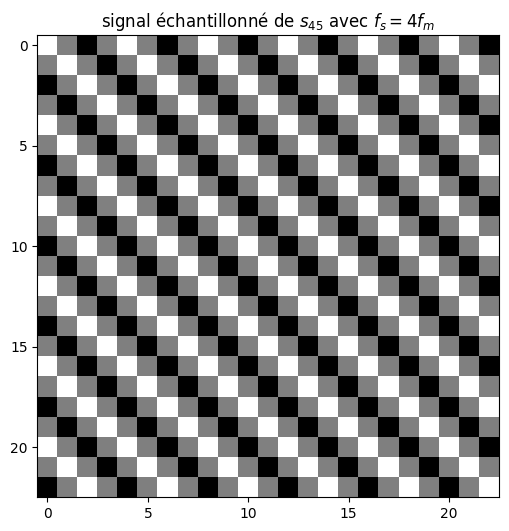

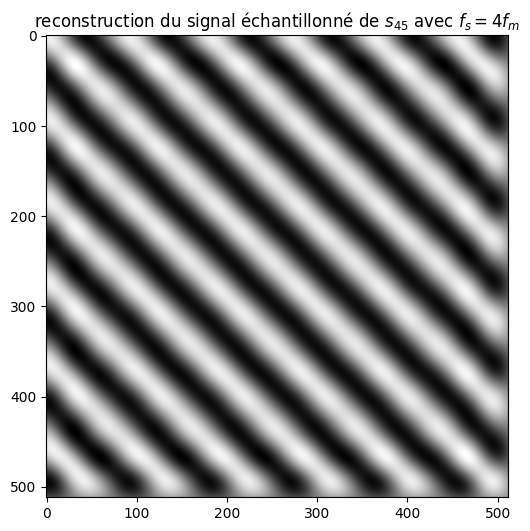

In [12]:
reconstructed4fm = shannonInterpolation(sampled4fm, T4, L)
print(f"relative average error : {error(A, reconstructed4fm, s45, L)}")
imshow(sampled4fm, "signal échantillonné de $s_{45}$ avec $f_s = 4f_m$")
imshow(reconstructed4fm, "reconstruction du signal échantillonné de $s_{45}$ avec $f_s = 4f_m$")

L'échantillonnage conduit naturellement à une perte de l'information lors de la reconstruction du signal échantillonné. Elle reste négligeable lorsque la loi de Shannon est respectée. Dans cet exemple le taux d'échantillonnage utilisé est proche de la limite définie par Shannon, cette erreur pourrait être réduite en l'augmentant encore plus.

4. Same question than 3. with $f_s = \frac32f_m$. Comment the effects of aliasing.

relative average error : 0.40686264750146783


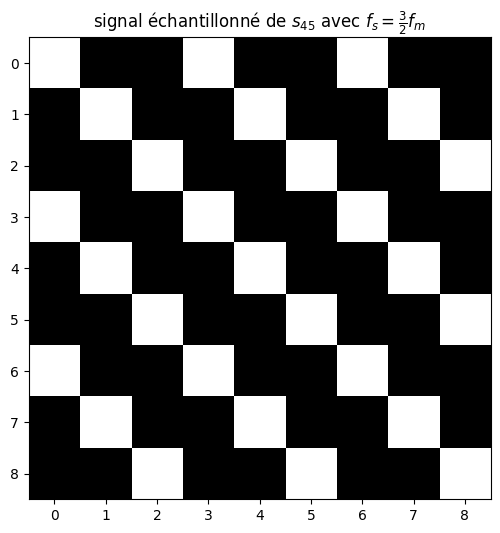

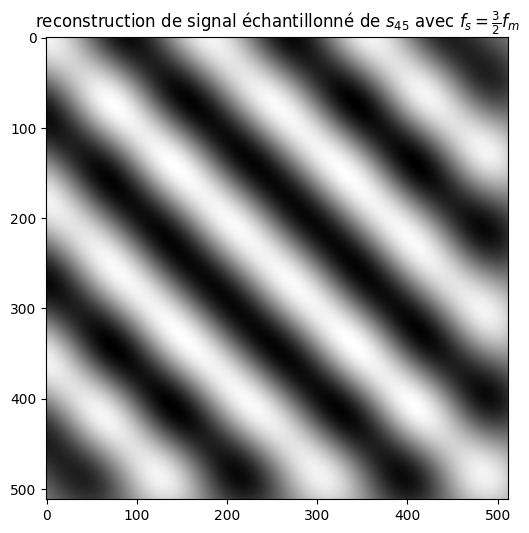

In [13]:
fs32 = 3/2 * fm
T32 = 1/fs32
sampled32fm = sinusoid2d(A, theta, L, T0, T32)
reconstructed32fm = shannonInterpolation(sampled32fm, T32, L)
print(f"relative average error : {error(A, reconstructed32fm, s45, L)}")
imshow(sampled32fm, "signal échantillonné de $s_{45}$ avec $f_s = \\frac{3}{2} f_m$")
imshow(reconstructed32fm, "reconstruction de signal échantillonné de $s_{45}$ avec $f_s = \\frac{3}{2} f_m$")

Le signal n’a pas pu être entièrement reconstruit car certaines données sont manquantes (comme le montrent les bandes plus larges que prévu). La fréquence fondamentale de l’image reconstruite est trop faible.
En effet cet échantillonnage ne respecte pas la loi de Shannon et provoque alors de l'aliasing. Le résultat est alors un signal déformé.

5. Consider the continuous signal with an oriention of $\theta=10°$. What is the value of $f_m$? With a sampling of $\frac32 f_s$ what is the additional drawback appearing after the reconstruction? Explain.

In [ ]:
# fm est égale à f0*cos(10) car 10 < 45 et sin(10) < cos(10)
fm = 1/T0*np.cos(np.deg2rad(10))
fs = 3/2*fm
ts = 1/fs

s10 = sinusoid2d(A, 10, L, T0, 1)
sampled1032 = sinusoid2d(A, 10, L, T0, fs) # ça ne marche plus, génère une erreur je n'ai pas compris la raison
reconstructed1032 = shannonInterpolation(sampled1032, ts, 512)

for i in [s10, sampled1032, reconstructed1032] : 
    imshow(i)
imshow(toVisualizeFT(computeFT(reconstructed1032)))
print(error(A, reconstructed1032, s10, L))

0.984807753012208
64


Donc cette fois ci on a :
- $f^{max}_t = f_0cos\theta = \frac{1}{64} \times cos10 \approx 0,015$
- $f^{max}_u = f_0sin\theta = \frac{1}{64} \times sin10 \approx 0,0027$
Ensuite, on obtient : 
$$f_m = max(f_t^{max}, f_u^{max}) = 0,015$$

L'orientation dans le signal reconstruit n'est pas du tout la même que celle du signal initial. En plus, le signal reconstruit a une fréquence fondamentale qui est différente que celle du signal initial.

6. Write a function `shannonInterpolationLoop()` implementing equation (1) using four nested loops, in a C way. Compare and discuss the run time of this function and  `shannonInterpolation()` on a small signal ($L=64$). Runtime can be measured using `tic()` and `tac()` functions.

In [14]:
from time import process_time
mytime = 0
def tic():
    """ NoneType -> NoneType """
    global mytime
    mytime = process_time()
def tac():
    """ NoneType -> int """
    global mytime
    print (process_time()-mytime)
    mytime = process_time()

### your code starts below
def shannonInterpolationLoop(x_s, Ts, size):
    # boucle de type C : for
    K, L = x_s.shape
    x_r = np.zeros((size, size))
    
    for t in range(size):
        for u in range(size):
            val = 0
            for k in range(K):
                for l in range(L):
                    val += x_s[k, l] * np.sinc((t/Ts) - k) * np.sinc((u/Ts) - l)
            x_r[t, u] = val
    return x_r
            

0.0


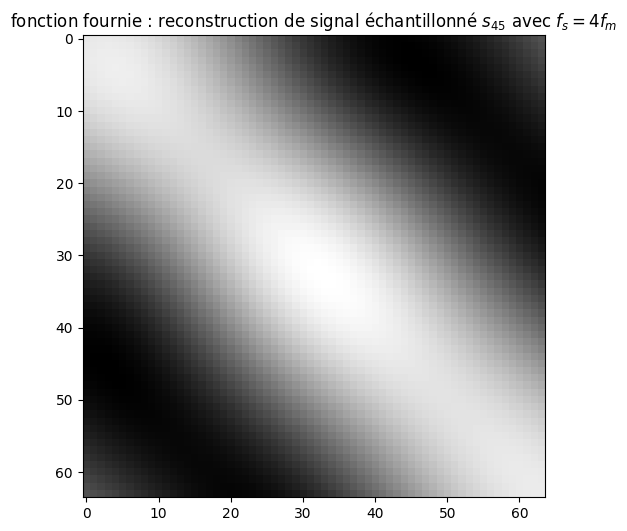

6.390625


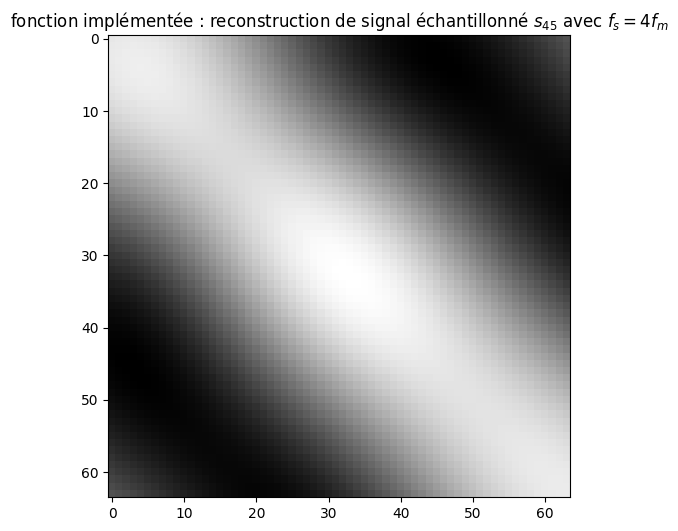

In [15]:
tic()
SI = shannonInterpolation(sampled4fm, T4, 64)
tac()
imshow(SI, "fonction fournie : reconstruction de signal échantillonné $s_{45}$ avec $f_s = 4f_m$")

tic()
SIL = shannonInterpolationLoop(sampled4fm, T4, 64)
tac()
imshow(SIL, "fonction implémentée : reconstruction de signal échantillonné $s_{45}$ avec $f_s = 4f_m$")


## Exercise 2: aliasing on natural images

In this exercise, we study aliasing on image `img/barbara.png`. Aliasing occurring with subsample of image, we propose to write a code that implements a subsample (using function `subSample2()` of factor 2 on the image.  

1. Explain what is a subsample of factor 2 and the impact when applied on an image. 

Subsample = sous-échantillonnage.
Le sous-échantillonnage de facteur 2 vise à retirer un pixel sur deux de l'image d'origine, dans les deux directions. Cela revient à diviser la taille de l'image par 2 dans chaque dimension. 
Impact : 
- perte de détails
- risque d'aliasing

Si la fréquence d'échantillonnage utilisée est inférieure à deux fois de la fréquence maximale du signal, on parle alors de sous-échantillonnage. Donc si la condition du theorème de Shannon n'est pas respecté, on parle alors de sous-échantillonnage. D'où le risque d'aliasing.

2. Write a code that
 - iterates the subsampling process
 - at each iteration, computes the Fourier transform of the subsampled image

   Display subsampled images and their spectrum. Describe and interpret the effects of aliasing. Why aliasing is a drawback ?

Avec l'aliasing, le spectre devient plus concentré. À cause de la perte de données lors de l'échantillonnage, l'aliasing peut rendre une image numérique floue et désagréable. Cela peut entraîner une pixellisation.


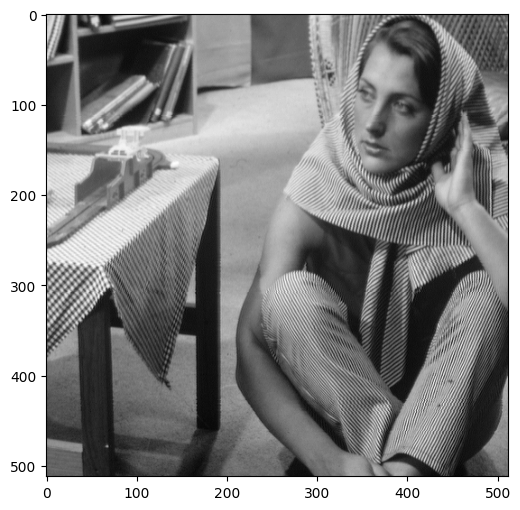

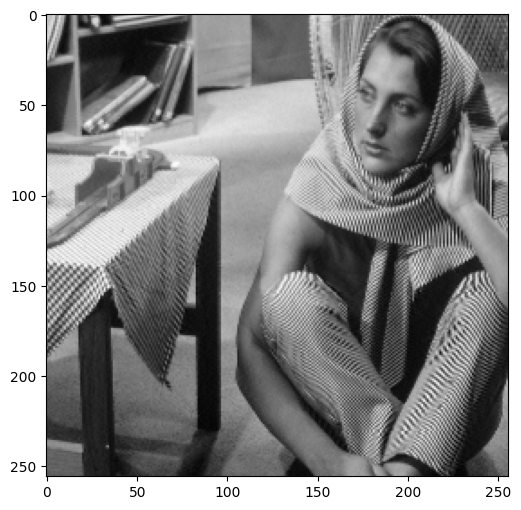

In [24]:
def subSample2(x_s):
    return x_s[::2,::2]

barbara = np.array(Image.open('img/barbara.png'))
x_ss = subSample2(barbara)
imshow(barbara)
imshow(x_ss)

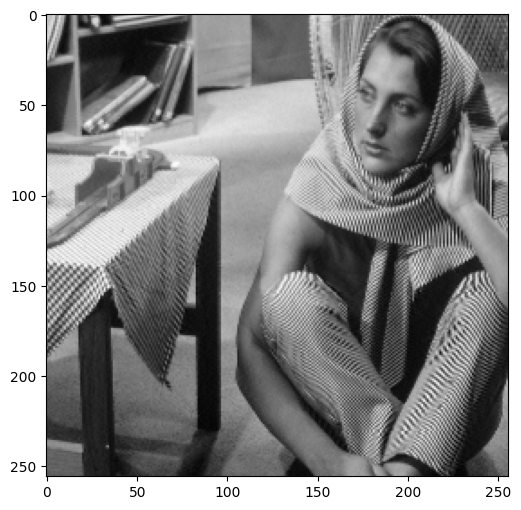

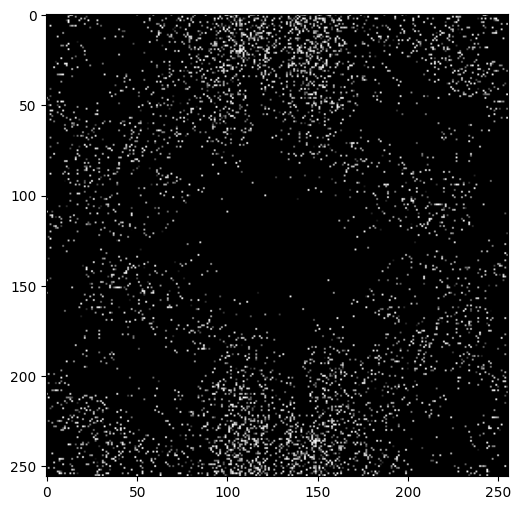

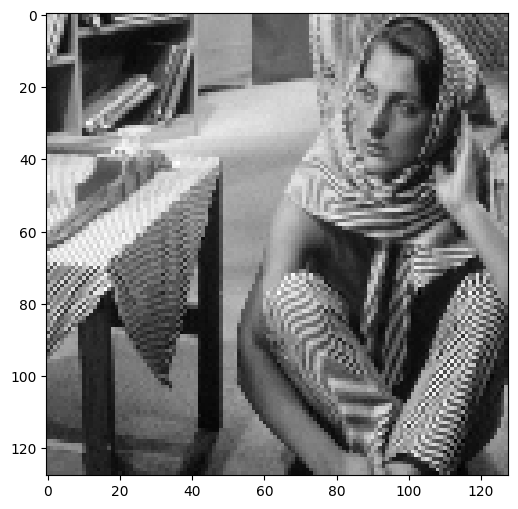

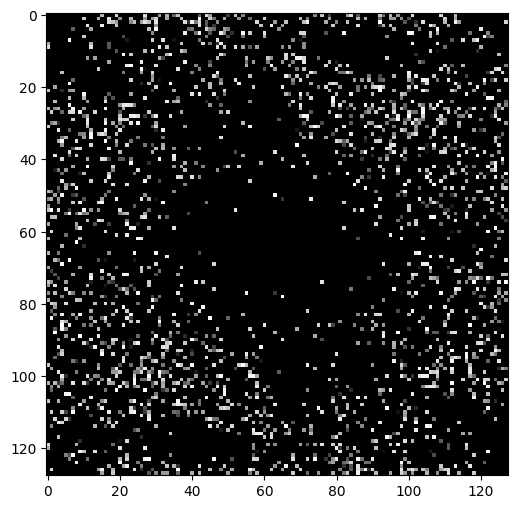

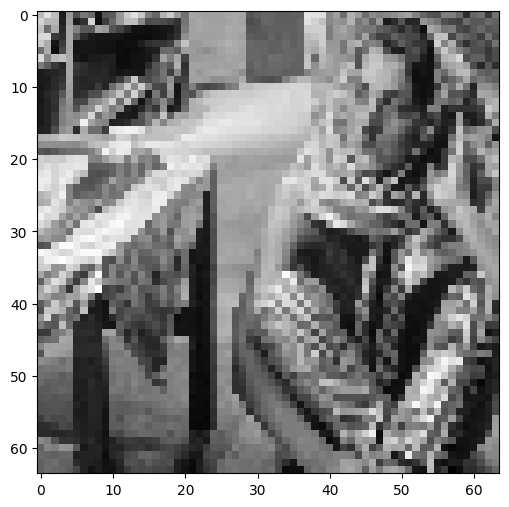

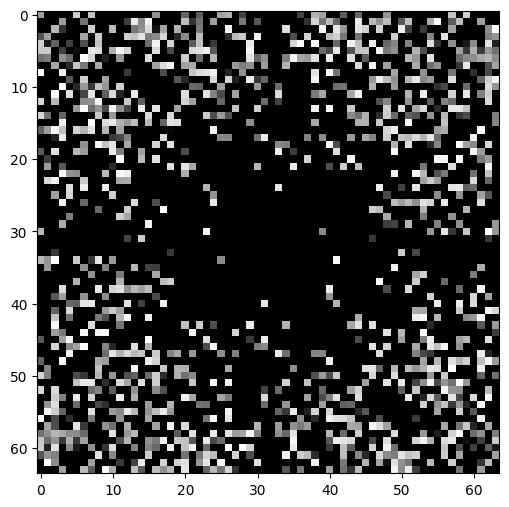

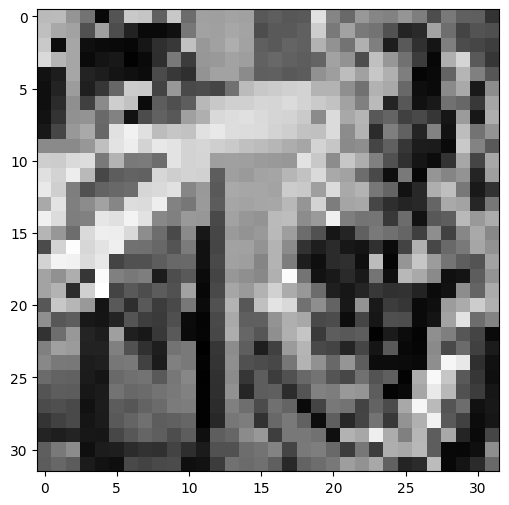

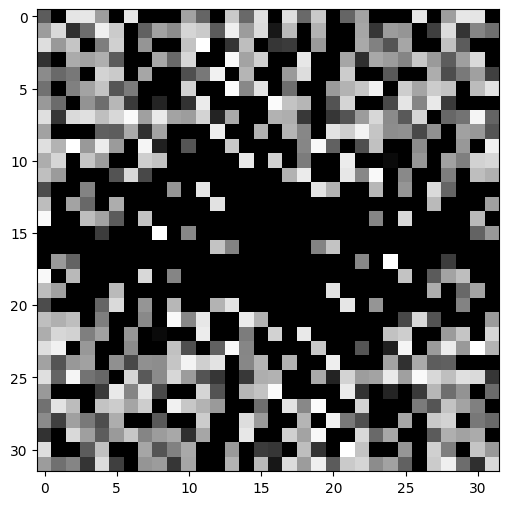

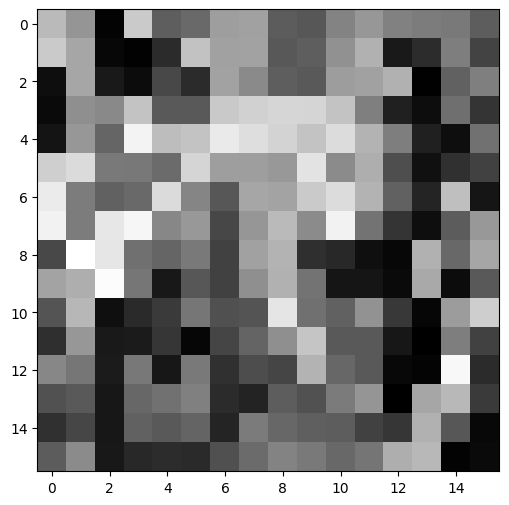

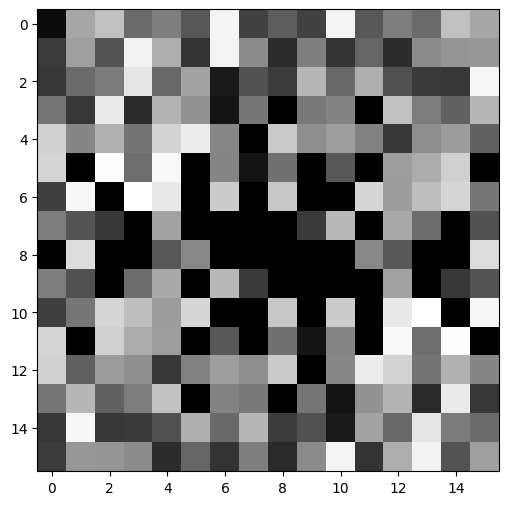

In [25]:
ba = barbara.copy()
for i in range(5):
    ba = subSample2(ba)
    imshow(ba)
    
    baFT = toVisualizeFT(computeFT(ba))
    baFT = np.where(baFT<=1000, baFT, 0) # Threshold
    imshow(baFT)

3. Same question with the image `img/mandrill.png`.

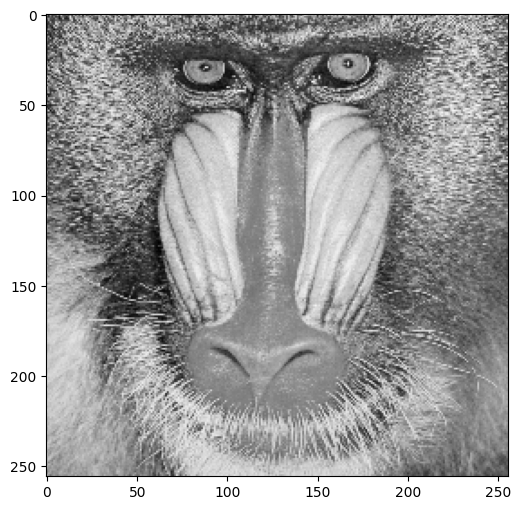

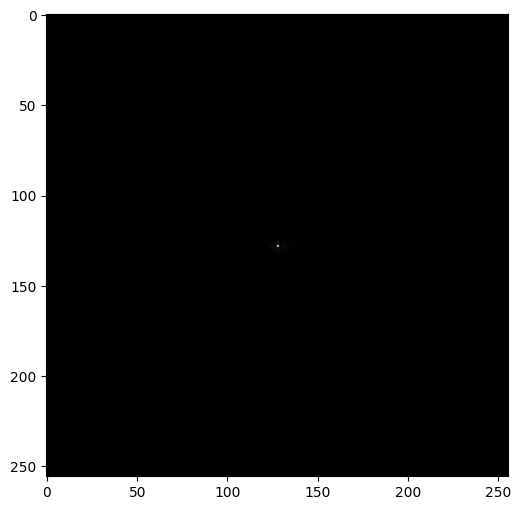

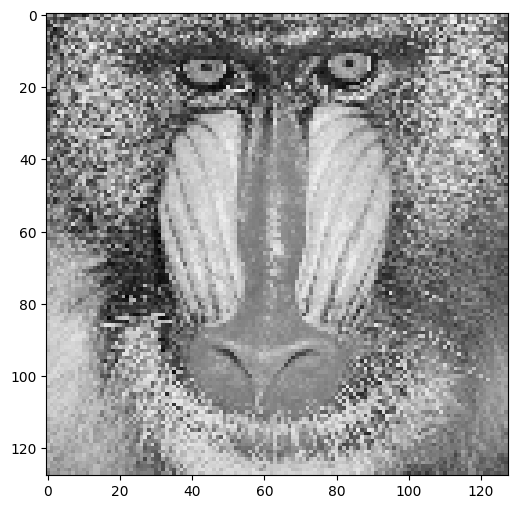

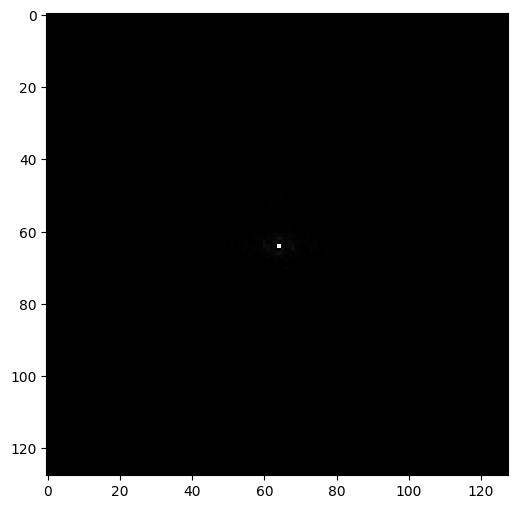

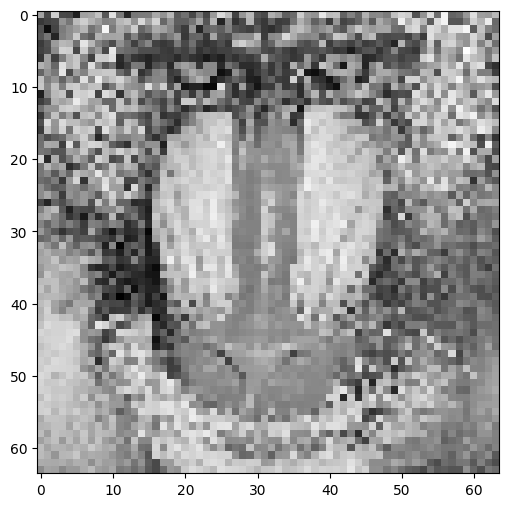

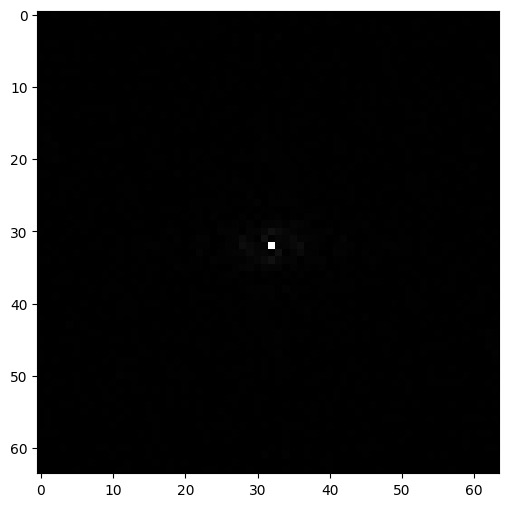

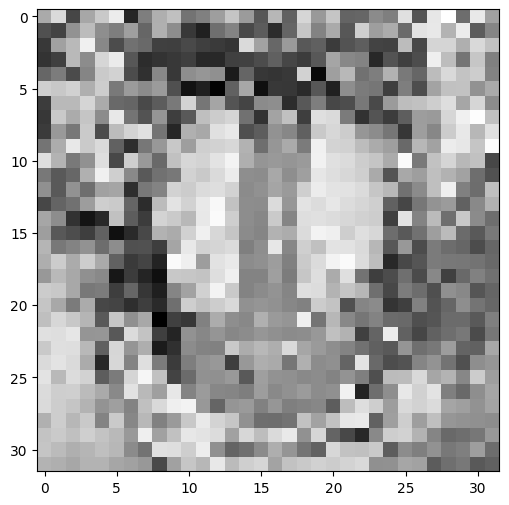

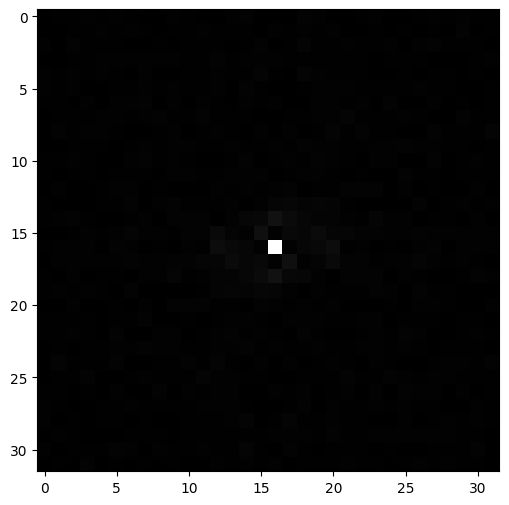

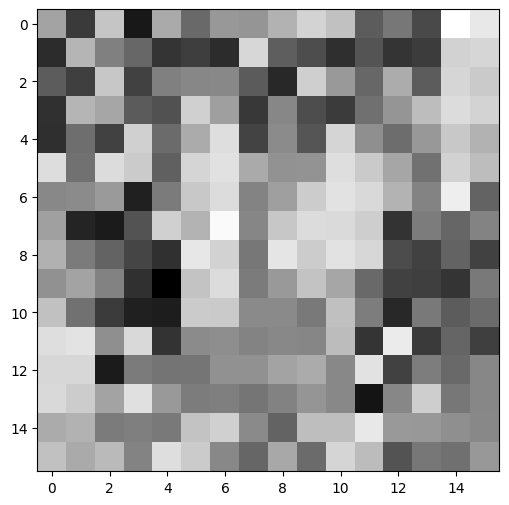

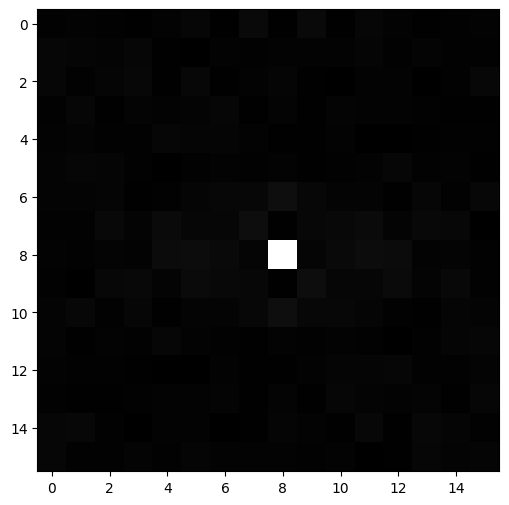

In [26]:
mandrill = np.array(Image.open('img/mandrill.png'))
### your code and comments start below
ma = mandrill.copy()
for i in range(5):
    ma = subSample2(ma)
    imshow(ma)
    
    maFT = toVisualizeFT(computeFT(ma))
    imshow(maFT)
